# Nombres Flottants

On rappelle que si $x\in\mathbb{R}^*$ et $a\in\mathbb{R}$ est une approximation de $a$, l'erreur absolue faite en approchant $x$ par $a$ est $E_{{\rm abs}}=|a-x|$. L'erreur relative faite en approchant $x$ par $a$ est, quant à elle, $E_{{\rm rel}}=|(a - x)/x|=|a/x - 1|$.

On remarque que si $x$ est une grandeur physique, l'erreur absolue a même dimension que $x$ et l'erreur relative est une grandeur sans dimension. Par exemple, si on considère l'altitude du du Mont-Blanc qui est de $x=4810~m$, et qu'on l'approche par $a=5000~m$, l'erreur absolue est de $193~m$ et l'erreur relative est de l'ordre de $0.04$ soit $4\%$. En physique comme partout, c'est l'erreur relative qu'il convient de rendre faible. C'est donc sur cette erreur qu'on se focalisera dans ce TP.

On rappelle que les nombres flottants sont les nombres de la forme
$$a = \left(d_0 + \frac{d_1}{b} + \cdots + \frac{d_p}{2^p}\right) b^e$$
où $d_k\in\left\{0,1,\ldots,b-1 \right\}$ et $e$ est un entier vérifiant $m \leq e\leq M$. Python travaille avec des nombres flottants 64 bits pour lesquels $b=2$, $p=52$, $m=-1022$ et $M=1023$. En pratique, il est bon de faire comme si $b=10$, $p=16$, $m=-308$ et $M=308$. En effet, même si cela ne correspond pas réellement à ce qui se passe dans la mémoire de l'ordinateur, il est beaucoup plus simple pour vous d'imaginer que ce dernier travaille en base 10. Excepté le premier exercice, tous les exercices de ce TP mettent en valeur des problèmes qui existent quelle que soit la base utilisée.

Quel que soit $x\in\mathbb{R}$, il existe un nombre flottant $a$ tel que $E_{{\rm rel}}=|(a - x)/x|=|a/x - 1|\leq u=2^{-(p+1)}\approx 10^{-16}$. On retiendra donc que lorsqu'on travaille avec les nombres flottants en Python, tous les nombres sont arrondis avec une précision relative de l'ordre $10^{-16}$. Pour résumer :

* Lorsqu'on rentre un nombre flottant, seuls les 16 premiers chiffres significatifs sont gardés en mémoire.
* Après chaque opération élémentaire ($+$, $-$, $*$, $/$, $\sqrt{\cdot}$, $\sin$, etc), seuls les 16 premiers chiffres significatifs du résultat sont gardés.

# 1. Ca commence mal

In [1]:
0.1 + 0.2 == 0.3

False

In [2]:
0.1 + 0.2

0.30000000000000004

# 2. Calcul de dérivée

## Question 1

In [3]:
def derive_1(f, x, eps):
    return (f(x + eps) - f(x)) / eps

def derive_2(f, x, eps):
    return (f(x + eps) - f(x - eps)) / (2 * eps)

## Question 2

In [4]:
import numpy as np

In [5]:
derive_1(np.sqrt, 1, 10**(-0))

0.41421356237309515

In [6]:
derive_1(np.sqrt, 1, 10**(-4))

0.49998750062396624

In [7]:
derive_1(np.sqrt, 1, 10**(-8))

0.4999999969612645

In [8]:
derive_1(np.sqrt, 1, 10**(-12))

0.5000444502911705

Le nombre dérivé de $x\mapsto \sqrt{x}$ est de $1/2$ en 1. On se rend compte qu'en diminuant $\epsilon$, l'approximation donnée par la fonction derive_1 gagne d'abord en précision, avant de devenir moins précise. Ce phénomène s'explique de la manière suivante : plus $\epsilon$ est petit, plus $(f(x + \epsilon) - f(x))/\epsilon$ est proche de $f'(x)$. Cependant, plus $\epsilon$ est petit, plus $f(x+\epsilon)$ et $f(x)$ sont proches : les erreurs d'arrondi lors du calcul de ces deux grandeurs vont donc se faire sentir de plus en plus car on a une compensation catastrophique. C'est la raison pour laquelle, pour obtenir la meilleure approximation possible, il faudra choisir une valeur de $\epsilon$ petite, mais pas trop.

In [9]:
derive_2(np.sqrt, 1, 10**(-0))

0.7071067811865476

In [10]:
derive_2(np.sqrt, 1, 10**(-4))

0.5000000006244454

In [11]:
derive_2(np.sqrt, 1, 10**(-8))

0.5000000025123796

In [12]:
derive_2(np.sqrt, 1, 10**(-12))

0.5000444502911705

## Question 3

In [13]:
import matplotlib.pyplot as plt

In [14]:
def nb_chiffres_1(f, fprime, x, eps):
    return -np.log10(np.abs((derive_1(f, x, eps) - fprime(x)) / fprime(x)))

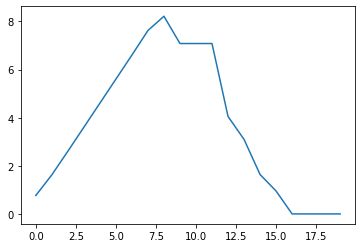

In [15]:
def f(x):
    return np.sqrt(x)

def fprime(x):
    return 1 / (2 * np.sqrt(x))

x1 = [k for k in range(0, 20)]
y1 = [nb_chiffres_1(f, fprime, 1, 10**(-k)) for k in x1]
plt.plot(x1, y1)

On remarque que le nombres de chiffres corrects augmente lorsque $\epsilon$ diminue. Ce phénomène a lieu jusqu'à une valeur de l'ordre de $10^{-8}\approx\sqrt{u}$. Puis, la précision diminue, et devient exécrable lorsque $\epsilon$ devient petit devant $10^{-16}=u$. En effet, pour de telles valeurs, $1+\epsilon$ est arrondi à 1, donc $f(1 + \epsilon)$ renvoie le même résultat que $f(1)$ et donc la valeur renvoyée par la fonction derive_1 est 0.

## Question 4

In [16]:
def nb_chiffres_2(f, fprime, x, eps):
    return -np.log10(np.abs((derive_2(f, x, eps) - fprime(x)) / fprime(x)))

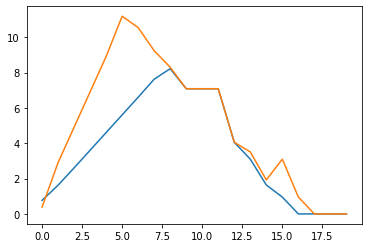

In [17]:
x2 = [k for k in range(0, 20)]
y2 = [nb_chiffres_2(f, fprime, 1.0, 10**(-k)) for k in x2]
plt.plot(x1, y1)
plt.plot(x2, y2)

La même phénomène se produit avec la seconde méthode d'approximation. On remarque cependant qu'on obtient plus rapidement une meilleure précision et que la valeure optimale de $\epsilon$ est de l'ordre de $10^{-5}\approx u^{\frac{1}{3}}$.

# 3. Un calcul d'intégrale

## Question 2

In [18]:
def u(n):
    res = np.exp(1) - 1
    for k in range(1, n + 1):
        res = np.exp(1) - k * res
    return res

## Question 3

In [19]:
[u(k) for k in range(25)]

[1.718281828459045,
 1.0,
 0.7182818284590451,
 0.5634363430819098,
 0.4645364561314058,
 0.395599547802016,
 0.34468454164694906,
 0.30549003693040166,
 0.27436153301583177,
 0.24902803131655915,
 0.22800151529345358,
 0.21026516023105568,
 0.19509990568637692,
 0.18198305453614516,
 0.17051906495301283,
 0.1604958541638526,
 0.15034816183740363,
 0.16236307722318344,
 -0.2042535615582568,
 6.599099498065924,
 -129.26370813285942,
 2717.256152618507,
 -59776.91707577869,
 1374871.8110247385,
 -32996920.746311896]

On montre facilement que pour tout entier naturel $n$, $0\leq u_n\leq e/(n+1)$. En particulier, la suite $(u_n)$ converge vers 0. On démontre de même que la suite $(u_n)$ est décroissante. Cependant, numériquement, on observe bien une suite positive et décroissante jusqu'à $n=16$, puis elle commence a recroitre, et changer de signe de manière  totalement chaotique. Ce comportement n'est pas surprenant, car si une erreur de l'ordre de $\delta>0$ est commise sur la valeur initiale $u_0$, elle devient $n!\delta$ après $n$ itérations. Si $\delta$ est de l'ordre de $u$, il suffit de 16 itérations pour que $n!\delta$ ne soit plus négligeable devant 1.

# 4. Suite de Jean-Michel Muller

## Question 1

In [20]:
def u(n):
    a = 2
    b = -4
    for k in range(n):
        a, b = b, 111 - 1130/b + 3000/(a * b)
    return a

In [21]:
[u(k) for k in range(25)]

[2,
 -4,
 18.5,
 9.378378378378379,
 7.801152737752169,
 7.154414480975333,
 6.806784736924811,
 6.592632768721792,
 6.449465934053933,
 6.348452060746624,
 6.274438662728116,
 6.218696768582163,
 6.17585385581539,
 6.142627170481006,
 6.120248704570159,
 6.166086559598099,
 7.235021165534931,
 22.062078463525793,
 78.57557488787224,
 98.34950312216536,
 99.8985692661829,
 99.99387098890278,
 99.99963038728635,
 99.99997773067949,
 99.99999865921669]

Numériquement, la suite semble d'abord converger vers 6, puis elle s'échappe et converge rapidement vers 100. Cependant, la théorie montre que $(u_n)$ converge vers 6. Pour comprendre ce phénomène, on peut voir que si on écrit $u_n=v_{n+1} / v_n$, alors $v_n$ vérifie la relation de récurrence $v_{n+3}=111v_{n+2}-1130v_{n+1}+3000 v_n$. Le polynôme caractéristique de cette relation de récurrence est $X^3-111X^2+1130X-3000$ dont les racines sont 5, 6 et 100. On en déduit qu'il existe $\alpha, \beta, \gamma\in\mathbb{R}$ tels que $v_{n}=\alpha 100^n + \beta 6^n + \gamma 5^n$. Donc
$$u_{n}=\frac{\alpha 100^{n+1} + \beta 6^{n+1} + \gamma 5^{n+1}}{\alpha 100^n + \beta 6^n + \gamma 5^n}$$
Jean-Michel Muller a choisit les valeurs initiales $u_0$ et $u_1$ pour avoir $\alpha=0$ et $\beta\neq 0$. La suite $(u_n)$ converge donc vers 6. Mais les erreurs d'arrondis vont faire comme si $\alpha$ n'était pas exactement égal à 0. Dans ce cas, la suite $(u_n)$ converge vers 100 : c'est ce qu'on observe numériquement.

# 5. De l'importance de choisir une bonne expression

## Question 1

In [22]:
def f1(x):
    return 1 / x - 1 / (x + 1)

def f2(x):
    return 1 / (x * (x + 1))

In [23]:
f1(10.0**13)

1.0009067165444198e-26

In [24]:
f2(10.0**13)

9.999999999999e-27

Lorsque $x$ devient grand, l'erreur relative entre $1/x$ et $1/(x+1)$ devient de plus en plus faible. On obtient alors une compensation catastrophique entre ces deux grandeurs. Il est donc plus judicieux d'utiliser la seconde expression pour calculer $f(x)$ car aucune compensation catastrophique n'a lieu.

## Question 2

In [25]:
def g1(x):
    return np.sqrt(x + 1) - np.sqrt(x)

def g2(x):
    return 1 / (np.sqrt(x + 1) + np.sqrt(x))

In [26]:
g1(10.0**13)

1.578591763973236e-07

In [27]:
g2(10.0**13)

1.58113883008415e-07

Lorsque $x$ devient grand, l'erreur relative entre $\sqrt{x+1}$ et $\sqrt{x}$ devient de plus en plus faible. On obtient alors une compensation catastrophique entre ces deux grandeurs. Il est donc plus judicieux d'utiliser la seconde expression pour calculer $f(x)$ car aucune compensation catastrophique n'a lieu.

## Question 3

In [28]:
def trinome(a, b, c):
    delta = b**2 - 4 * a * c
    u = (-b - np.sqrt(delta)) / (2 * a)
    v = (-b + np.sqrt(delta)) / (2 * a)
    return u, v

In [29]:
trinome(1, - 10.0**8, 1)

(7.450580596923828e-09, 100000000.0)

In [30]:
trinome(1, - 10.0**9, 1)

(0.0, 1000000000.0)

Dans notre cas, $b^2-4ac\approx b^2$. Puisque $b\geq 0$, on en déduit que $b\approx\sqrt{b^2-4ac}$. Un obtient donc une compensation catastrophique : la première racine, qui est de l'ordre $10^{-9}$, est remplacée par 0 dans notre fonction. Cela viole la relation qui dit que le produit des racines est $c/a=1$. Cela nous donne l'idée d'utiliser cette relation après avoir calculé la racine pour laquelle aucune compensation catastrophique n'a lieu. Puis, on calcule l'autre racine en utilisant le fait que $x_1 x_2=c/a$.

In [31]:
def trinome(a, b, c):
    delta = b**2 - 4 * a * c
    if b >= 0:
        u = (-b - np.sqrt(delta)) / (2 * a)
        v = (c / a) / u
    else:
        v = (-b + np.sqrt(delta)) / (2 * a)
        u = (c / a) / v
    return u, v

In [32]:
trinome(1, - 10.0**9, 1)

(1e-09, 1000000000.0)

## Question 4

In [33]:
import numpy as np

def f1(x):
    return (np.exp(x) - 1) / x

def f2(x):
    return (np.exp(x) - 1) / np.log(np.exp(x))

In [34]:
x = 1.0e-12

In [35]:
f1(x), (f1(x) - 1) / (x / 2)

(1.000088900582341, 177801164.68202323)

In [36]:
f2(x), (f2(x) - 1) / (x / 2)

(1.0000000000005, 1.000088900582341)

On voit bien que la deuxième implémentation est bien meilleure que la première puisque le deuxième terme calculé est proche de 1, comme prévu. Pour la première expression, le premier terme est très grand devant 1 ce qui montre bien que notre approximation est beaucoup moins bonne.